In [1]:
!git clone https://github.com/abdullah-aleem/Single-Image-Super-Resolution.git

Cloning into 'Single-Image-Super-Resolution'...


In [2]:
%cd /content/Single-Image-Super-Resolution
from google.colab import files

# Upload the ZIP file containing the folder
uploaded = files.upload()


/content/Single-Image-Super-Resolution


Saving archive.zip to archive.zip


In [3]:
import zipfile
import io

# Specify the name of the uploaded ZIP file
zip_file_name = 'archive.zip'

# Extract the contents of the ZIP file
with zipfile.ZipFile(io.BytesIO(uploaded[zip_file_name]), 'r') as zip_ref:
    zip_ref.extractall('')

# **Image Pre Processing**

In [4]:
import os
import cv2
import numpy as np

# Function to perform bicubic downsampling
def bicubic_downsampling(img, scale_factor):
    h, w = img.shape[:2]
    new_h = int(h / scale_factor)
    new_w = int(w / scale_factor)
    resized_img = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_CUBIC)
    return resized_img

# Path to the BSDS500 dataset directory
dataset_dir = "images/test"

# Output directory for saving preprocessed images
output_dir = "images/new"

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Iterate through each image in the BSDS500 dataset
for filename in os.listdir(dataset_dir):
    if filename.endswith(".jpg"):  # Assuming images are in JPEG format
        # Read the image
        img_path = os.path.join(dataset_dir, filename)
        img = cv2.imread(img_path)

        # Perform bicubic downsampling to generate low-resolution image
        scale_factor = 2  # Define the scale factor for downsampling
        lr_img = bicubic_downsampling(img, scale_factor)

        # Save the low-resolution image
        lr_img_path = os.path.join(output_dir, f"{filename}")
        cv2.imwrite(lr_img_path, lr_img)

        print(f"Processed: {filename}")

print("Data preprocessing completed.")


Processed: 235098.jpg
Processed: 106005.jpg
Processed: 130066.jpg
Processed: 120003.jpg
Processed: 225022.jpg
Processed: 16068.jpg
Processed: 17067.jpg
Processed: 61034.jpg
Processed: 80085.jpg
Processed: 81090.jpg
Processed: 289011.jpg
Processed: 15011.jpg
Processed: 79073.jpg
Processed: 118031.jpg
Processed: 384022.jpg
Processed: 112056.jpg
Processed: 290035.jpg
Processed: 29030.jpg
Processed: 112090.jpg
Processed: 175083.jpg
Processed: 147080.jpg
Processed: 223060.jpg
Processed: 106047.jpg
Processed: 285022.jpg
Processed: 69007.jpg
Processed: 156054.jpg
Processed: 101027.jpg
Processed: 101084.jpg
Processed: 35028.jpg
Processed: 230063.jpg
Processed: 159022.jpg
Processed: 36046.jpg
Processed: 296028.jpg
Processed: 161045.jpg
Processed: 94095.jpg
Processed: 217013.jpg
Processed: 141048.jpg
Processed: 164046.jpg
Processed: 226060.jpg
Processed: 228076.jpg
Processed: 281017.jpg
Processed: 28083.jpg
Processed: 51084.jpg
Processed: 160006.jpg
Processed: 146074.jpg
Processed: 87015.jpg
Pro

Training Dataset Shapes: (160, 128, 128, 3) (160, 256, 256, 3)
Validation Dataset Shapes: (40, 128, 128, 3) (40, 256, 256, 3)
Epoch 1/20
5/5 [==============================] - 21s 4s/step - loss: 0.1280 - accuracy: 0.3595 - val_loss: 0.0534 - val_accuracy: 0.5276
Epoch 2/20
5/5 [==============================] - 20s 4s/step - loss: 0.0436 - accuracy: 0.3470 - val_loss: 0.0436 - val_accuracy: 0.1401
Epoch 3/20
5/5 [==============================] - 19s 4s/step - loss: 0.0318 - accuracy: 0.2405 - val_loss: 0.0227 - val_accuracy: 0.3598
Epoch 4/20
5/5 [==============================] - 20s 4s/step - loss: 0.0239 - accuracy: 0.4563 - val_loss: 0.0209 - val_accuracy: 0.5301
Epoch 5/20
5/5 [==============================] - 20s 4s/step - loss: 0.0219 - accuracy: 0.4767 - val_loss: 0.0200 - val_accuracy: 0.5407
Epoch 6/20
5/5 [==============================] - 20s 4s/step - loss: 0.0192 - accuracy: 0.4629 - val_loss: 0.0170 - val_accuracy: 0.4557
Epoch 7/20
5/5 [==============================

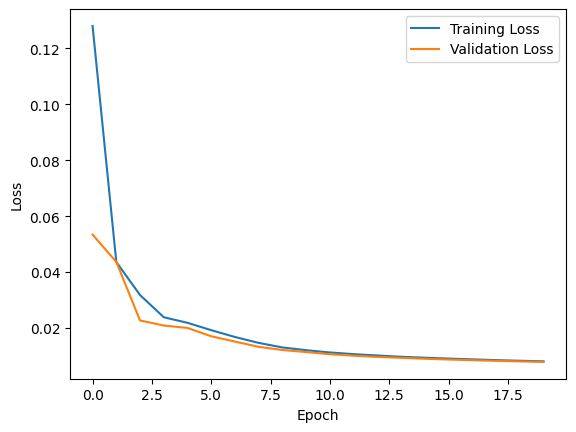

In [51]:
import numpy as np
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, UpSampling2D
# Define the paths to the directories containing low-resolution and high-resolution images
low_res_dir = 'images/new'
high_res_dir = 'images/test'

# Define image dimensions and scale factor
height = 128  # Update with the desired height of images
width = 128   # Update with the desired width of images
scale_factor = 2  # Change this according to your super-resolution task

# Function to load and preprocess images
def load_and_preprocess_image(low_res_path, high_res_path):
    low_res_img = load_img(low_res_path, target_size=(height, width))
    high_res_img = load_img(high_res_path, target_size=(height * scale_factor, width * scale_factor))

    low_res_img = img_to_array(low_res_img) / 255.0
    high_res_img = img_to_array(high_res_img) / 255.0

    return [low_res_img, high_res_img]

# List to store image pairs
image_pairs = []

# Iterate through the low-resolution directory to collect image paths
for filename in os.listdir(low_res_dir):
    if filename.endswith('.jpg'):
        low_res_path = os.path.join(low_res_dir, filename)
        high_res_path = os.path.join(high_res_dir, filename)  # Assuming corresponding high-resolution images have same filename
        if os.path.exists(high_res_path):  # Check if corresponding high-res image exists
            image_pairs.append(load_and_preprocess_image(low_res_path, high_res_path))
            if(len(image_pairs[-1])!=2):
              print("here")

# Convert list of image pairs to numpy array

# image_pairs = np.array(image_pairs)

# Separate low-resolution and high-resolution images
low_res_images = np.array([pair[0] for pair in image_pairs])
high_res_images = np.array([pair[1] for pair in image_pairs])

# Split the dataset into training and validation sets
train_low_res, val_low_res, train_high_res, val_high_res = train_test_split(low_res_images, high_res_images, test_size=0.2, train_size=0.8, random_state=42)


# Define batch size
batch_size = 32

# Create TensorFlow datasets for training and validation
train_dataset = tf.data.Dataset.from_tensor_slices((train_low_res, train_high_res)).shuffle(buffer_size=10000).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((val_low_res, val_high_res)).batch(batch_size)

# Print dataset shapes for verification
print("Training Dataset Shapes:", train_low_res.shape, train_high_res.shape)
print("Validation Dataset Shapes:", val_low_res.shape, val_high_res.shape)
# Define the scale factor
scale_factor = 2  # Change this according to your super-resolution task

# Define the model architecture
model = Sequential([
    Conv2D(filters=64, kernel_size=9, activation='relu', padding='same', input_shape=(height, width, 3)),
    Conv2D(filters=32, kernel_size=1, activation='relu', padding='same'),
    Conv2D(filters=3, kernel_size=5, activation='relu', padding='same'),
    UpSampling2D(size=(scale_factor, scale_factor))
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Define number of epochs
epochs = 20

# Train the model
history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)

# Evaluate the model
val_loss = model.evaluate(val_dataset)

# Visualize training progress (optional)
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [52]:
model.save('my_model')

In [22]:
!git add .
!git commit -m "completed"

On branch main
Your branch is based on 'origin/main', but the upstream is gone.
  (use "git branch --unset-upstream" to fixup)

nothing to commit, working tree clean


In [55]:
y=model.predict(train_low_res[1].reshape(1,128,128,3))





1/1 [==============================] - 0s 44ms/step


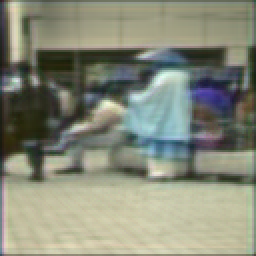

In [56]:
from google.colab.patches import cv2_imshow

y = y.reshape(256,256,3)
y = y * 255
cv2_imshow(y)

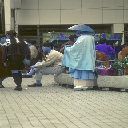

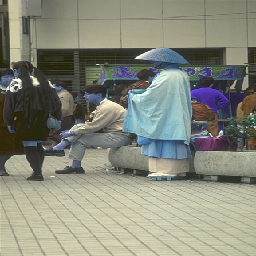

In [57]:
cv2_imshow(train_low_res[1]*256)
cv2_imshow(train_high_res[1]*256)
